In [15]:
# !pip install tsfel
# !pip install pandas
import pandas as pd
import numpy as np
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [16]:
def decision_tree_features(depth = None):
    feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',sep = '\\s+',header=None)
    dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',sep = '\\s+',header=None)
    dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',sep = '\\s+',header=None)
    test_values_y = pd.read_csv(r'../HAR/UCI HAR Dataset/test/y_test.txt',sep = "\\s+",header=None)
    test_data_X = pd.read_csv(r'../HAR/UCI HAR Dataset/test/X_test.txt',sep = "\\s+",header=None)
    correlation_matrix = dataframeX.corr()
    threshold = 0.98
    removals = []
    # type(feature_labels[1])
    # count = 0
    # for i in range(len(feature_labels[1].duplicated())):
    #     if feature_labels[1].duplicated()[i] == True:
    #         count+=1

    #         print(i,feature_labels[1][i])
    # print(count)
    pairs = product(range(len(correlation_matrix.columns)), repeat=2)

    for i, j in pairs:
        if i > j:
            correlation_value = correlation_matrix.iloc[i, j]
            if abs(correlation_value) > threshold and correlation_value != 1:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                if colname_i not in removals and colname_j not in removals:
                    removals.append(colname_i)

    selected_features = [col for col in dataframeX.columns if col not in removals]
    filtered_dfX = dataframeX[selected_features]
    

    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(filtered_dfX, dataframeY)
    tree.plot_tree(clf)
    
    filtered_testx =test_data_X[selected_features]
    
    y_pred = clf.predict(filtered_testx)
    y_pred = np.array(y_pred)
    y_test = test_values_y[0].to_numpy()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = precision_score(y_test, y_pred,average='weighted')
    print(f"Precision: {precision}")
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    

Tree of Depth : 2
6
7
8
9
19
19
20
21
46
47
48
49
50
51
52
52
53
53
54
54
56
56
59
60
60
61
66
67
68
70
71
72
74
75
75
76
86
87
88
95
95
99
99
100
101
103
126
127
128
139
140
141
166
167
168
179
179
180
181
181
200
202
203
205
207
213
214
214
215
215
215
216
216
218
220
220
226
226
226
227
227
227
228
228
228
228
228
229
229
231
231
231
231
231
233
233
233
233
233
234
234
234
234
239
241
242
244
246
252
253
254
254
254
255
257
257
259
259
259
259
260
260
265
265
265
265
266
266
266
266
268
268
268
269
269
270
270
271
271
271
271
271
272
272
272
272
273
273
273
274
280
280
280
280
280
280
280
280
280
281
287
287
288
288
288
289
297
299
301
302
302
310
310
310
311
313
314
314
314
314
324
325
328
328
329
338
339
340
342
342
343
344
344
344
344
344
344
344
344
345
345
345
346
346
347
347
347
347
347
347
347
347
347
348
348
348
349
349
349
350
350
350
350
350
350
350
350
350
350
351
351
351
351
352
352
352
352
353
354
355
359
359
359
359
359
359
359
359
359
359
359
359
360
361
362
363
363
3

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

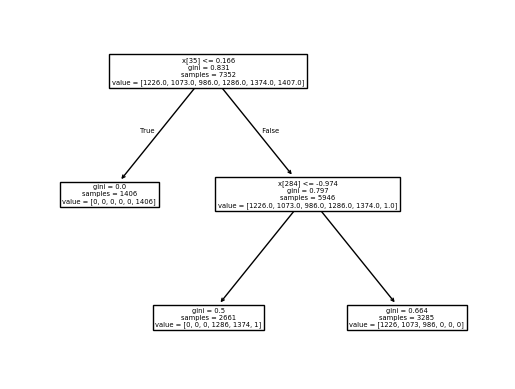

In [17]:
for i in range(2,9):
    print("Tree of Depth :",i)
    decision_tree_features(depth = i)